In [188]:
import sys, os
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload

In [189]:
try:
    sys.path.insert(0, "/home/piotr/CodeProjects/mhcevolution/PyScripts/")
except Exception:
    pass
try:
    sys.path.insert(0, "/home/piotr/MHCevo/PyScripts/")
except Exception:
    pass    

In [190]:
import packed_plots_of_MHC_alleles as ppma

In [191]:
cd /media/piotr/Elements/MHC_UAM/1000PATHO/

/media/piotr/Elements/MHC_UAM/1000PATHO


In [192]:
x_Label = "number of pathogen species"
theData_002 = np.genfromtxt("0.02_DataSlice.csv", dtype=ppma.outType)
meanResult_002 = ppma.buildStats(theData_002)
theData_008 = np.genfromtxt("0.08_DataSlice.csv", dtype=ppma.outType)
meanResult_008 = ppma.buildStats(theData_008)
meanResult = [meanResult_002, meanResult_008]

In [193]:
def plotAvgMHCsInIndiv(meanResult, x_label, y_label, indx=4, figNumb=1, yLim=25, 
                       legdLoc='upper left', logsc='linear'):
    """Uses the array generated by buildStats() function and plots a fancy plot
    of averaged data."""
    FS = 24
    titleFS = FS+4
    figSize = (24, 9)
    annoSize = int(1.1*FS)
    xtix = ("", "", "2", "", "", "4", "", "", "8", "", "", "", "", "", "", "",
            "16", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "",
            "32", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "",
            "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "",
            "64", "", "", "", "", "", "")
    k = (-0.35, 0.35)
    legd = (r'$10^{-5}$', r'$5\cdot10^{-5}$')
    clr = ('C0', 'C1', 'C2', 'C3', 'C4', 'C5')
    # One
    ll = []
    for itm in meanResult[0]:
        if itm[0] in ll:
            pass
        else:
            ll.append(itm[0])
    # Second plot - unique MHC alleles in one chromosome
    plt.figure(1, figsize=figSize)
    plt.subplot(121)
    for i, var in enumerate(ll):
        ww = meanResult[0][meanResult[0][:, 0] == var]
        plt.errorbar(ww[:, 1]+k[i], ww[:, indx], ww[:, indx+1], lw=2, marker='o', ms=10,
                     color=clr[i], label=legd[i])
    plt.title(r'           $\alpha = 0.02$', fontsize=titleFS, loc='left')
    plt.xlabel(str(x_label), fontsize=FS)
    plt.ylabel(str(y_label), fontsize=FS)
    plt.ylim((0, yLim))
    plt.xscale(logsc)
    plt.tick_params(axis='both', labelsize=annoSize, bottom='off')
    plt.xticks(np.arange(70), xtix, fontsize=FS+2)
    plt.grid(axis='y')
    plt.legend(frameon=False, loc=legdLoc, fontsize=FS-2)
    # Two
    ll = []
    for itm in meanResult[1]:
        if itm[0] in ll:
            pass
        else:
            ll.append(itm[0])
    # Second plot - unique MHC alleles in one chromosome
    plt.subplot(122)
    for i, var in enumerate(ll):
        ww = meanResult[1][meanResult[1][:, 0] == var]
        plt.errorbar(ww[:, 1]+k[i], ww[:, indx], ww[:, indx+1], lw=2, marker="o", 
                     ms=10, color=clr[i+2], label=legd[i])
    #plt.annotate(r'$\alpha = 0.08$', xy=(2, 27), size=annoSize)
    plt.title(r'           $\alpha = 0.08$', fontsize=titleFS, loc='left')
    plt.xlabel(str(x_label), fontsize=FS)
    #plt.ylabel("average number of MHC copies\nin an individual",
    #           fontsize=FS)
    plt.ylim((0, yLim))
    plt.xscale(logsc)
    plt.tick_params(axis='both', labelsize=annoSize, bottom='off')
    plt.xticks(np.arange(70), xtix, fontsize=FS+2)
    plt.grid(axis='y')
    plt.legend(frameon=False, loc=legdLoc, fontsize=FS-2)
    #plt.tight_layout(True)
    figPDF ="fig_" + str(figNumb) + ".pdf"
    figPNG = "fig_" + str(figNumb) + ".png"
    plt.savefig(figPDF, bbox_inches='tight')
    plt.savefig(figPNG, bbox_inches='tight')

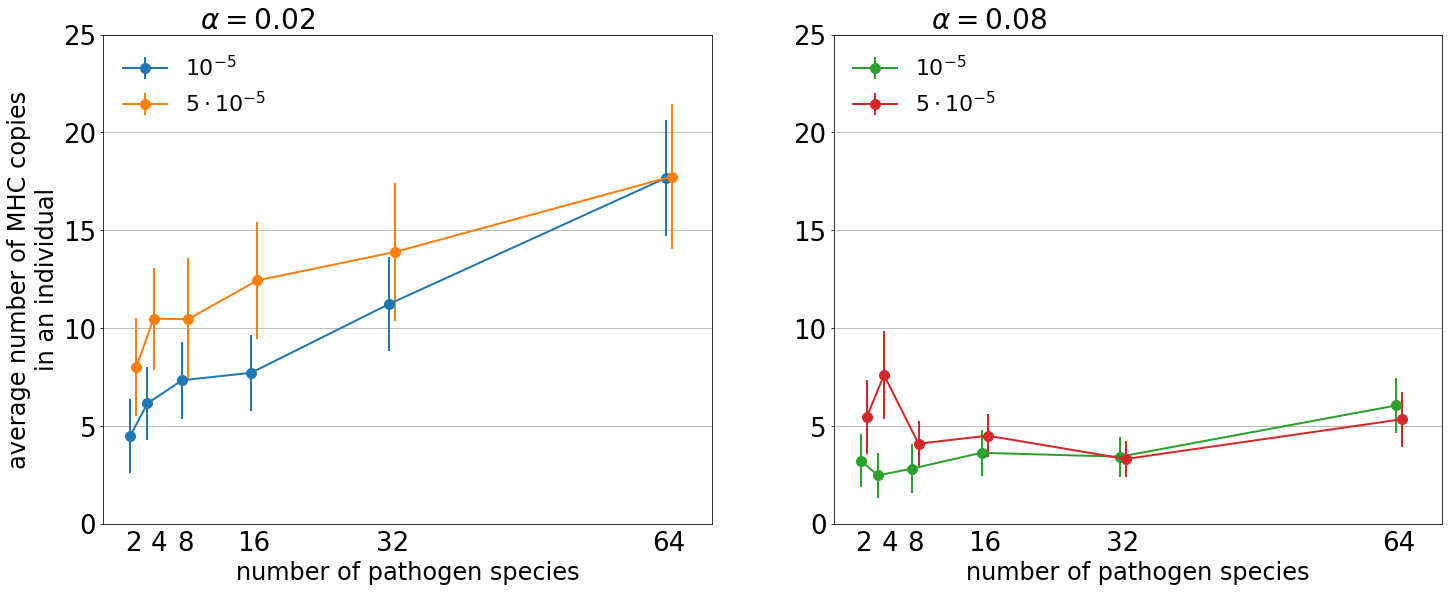

In [194]:
y_Label = "average number of MHC copies\nin an individual"
plotAvgMHCsInIndiv(meanResult, x_Label, y_Label, 4, 1, 25, 'upper left')
plt.show()

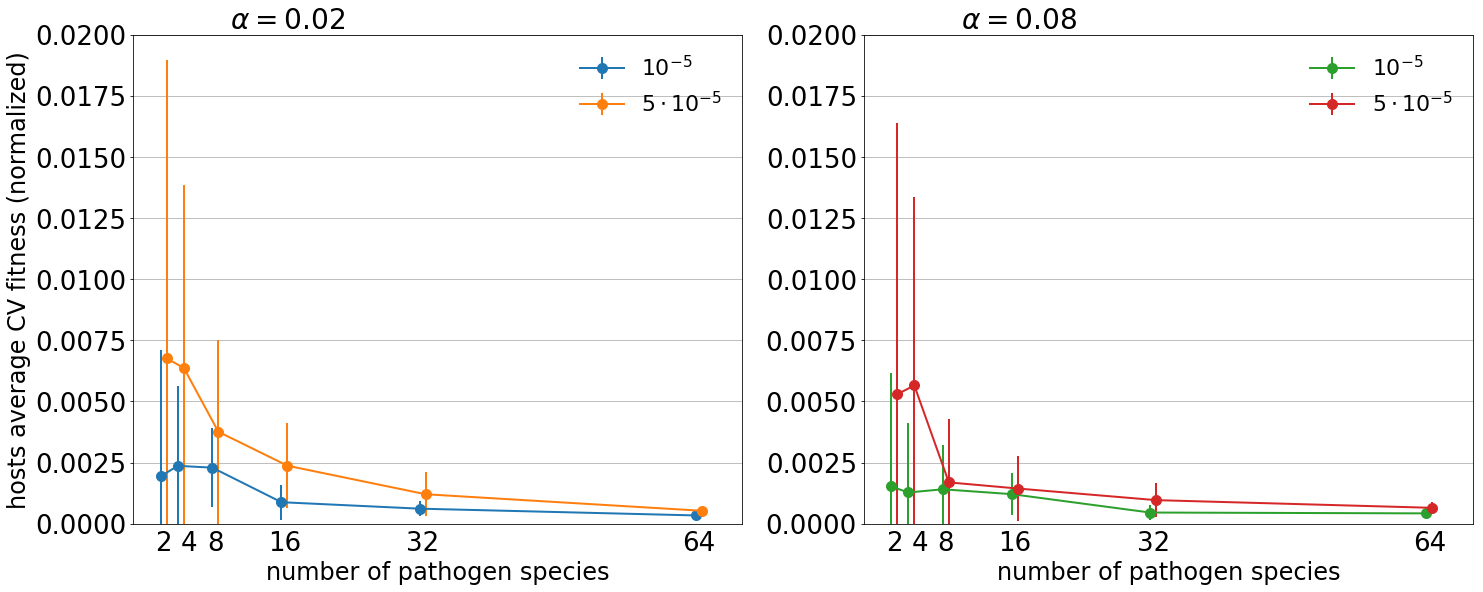

In [195]:
y_Label = "hosts average CV fitness (normalized)"
plotAvgMHCsInIndiv(meanResult, x_Label, y_Label, 8, 2, 0.02, 'upper right')
plt.show()

In [196]:
def plotDotMeans(theData_002,theData_008):
    """Plots number of MHC alleles in population vs average number of MHC in
    one chromosome."""
#    clrs = ['bo', 'go', 'ro', 'co', 'mo']  # , 'yo'  , 'ko', 'wo']
    clrs = ['bo', 'go', 'ro', 'co', 'mo', 'yo']
    clrs += ['bv', 'gv', 'rv', 'cv', 'mv', 'yv', 'kv', 'wv']
    clrs += ['bo', 'go', 'ro', 'co', 'mo', 'yo', 'ko', 'wo']
    muts = {1e-5: "$10^{-5}$", 5e-5: "$5\cdot10^{-5}$"}
    FS = 24
    titleFS = FS+4
    figSize = (24, 10)
    annoSize = int(1*FS)
    ll = []
    comp = []
    for itm in theData_002:
        mts = (muts[itm['VAR']], int(itm['VARX']))
        if (itm['VAR'], itm['VARX']) in ll:
            pass
        else:
            ll.append((itm['VAR'], itm['VARX']))
            comp.append(mts)
    plt.figure(5, figsize=figSize)
    plt.subplot(121)
    k = 0
    for ii, var in enumerate(ll):
        ww = theData_002[theData_002['VAR'] == var[0]]
        ww = ww[ww['VARX'] == var[1]]
        lbl = str(comp[ii][0]) + " ; " + str(comp[ii][1])
        plt.plot(ww['indvMean'], ww['meanAllel'], clrs[k], ms=8, label=lbl)
        k += 1
    plt.legend(loc='upper left',bbox_to_anchor=(0.11, -0.12), 
               numpoints=1, ncol=6, fontsize=20, frameon=False)
    plt.ylabel("mean number of MHC alleles in population",fontsize=FS)
    plt.xlabel("mean number of MHC alleles in one chromosome", fontsize=FS)
    plt.title(r'           $\alpha = 0.02$', fontsize=titleFS, loc='left')
    plt.xlim((0, 22))
    plt.ylim(ymin=0)
    plt.tick_params(axis='both', labelsize=annoSize)
    plt.grid(True)
    # Second set of data
    plt.subplot(122)
    k = 0
    for var in ll:
        ww = theData_008[theData_008['VAR'] == var[0]]
        ww = ww[ww['VARX'] == var[1]]
        plt.plot(ww['indvMean'], ww['meanAllel'], clrs[k], ms=8)
        k += 1
    #plt.ylabel("mean number of MHC alleles in population",
    #           fontsize=FS)
    plt.xlabel("mean number of MHC alleles in one chromosome", fontsize=FS)
    plt.title(r'           $\alpha = 0.08$', fontsize=titleFS, loc='left')
    plt.xlim((0, 22))
    plt.ylim(ymin=0)
    plt.tick_params(axis='both', labelsize=annoSize)
    plt.grid(True)
    plt.savefig("fig_4.png", bbox_inches='tight')
    plt.savefig("fig_4.pdf", bbox_inches='tight')

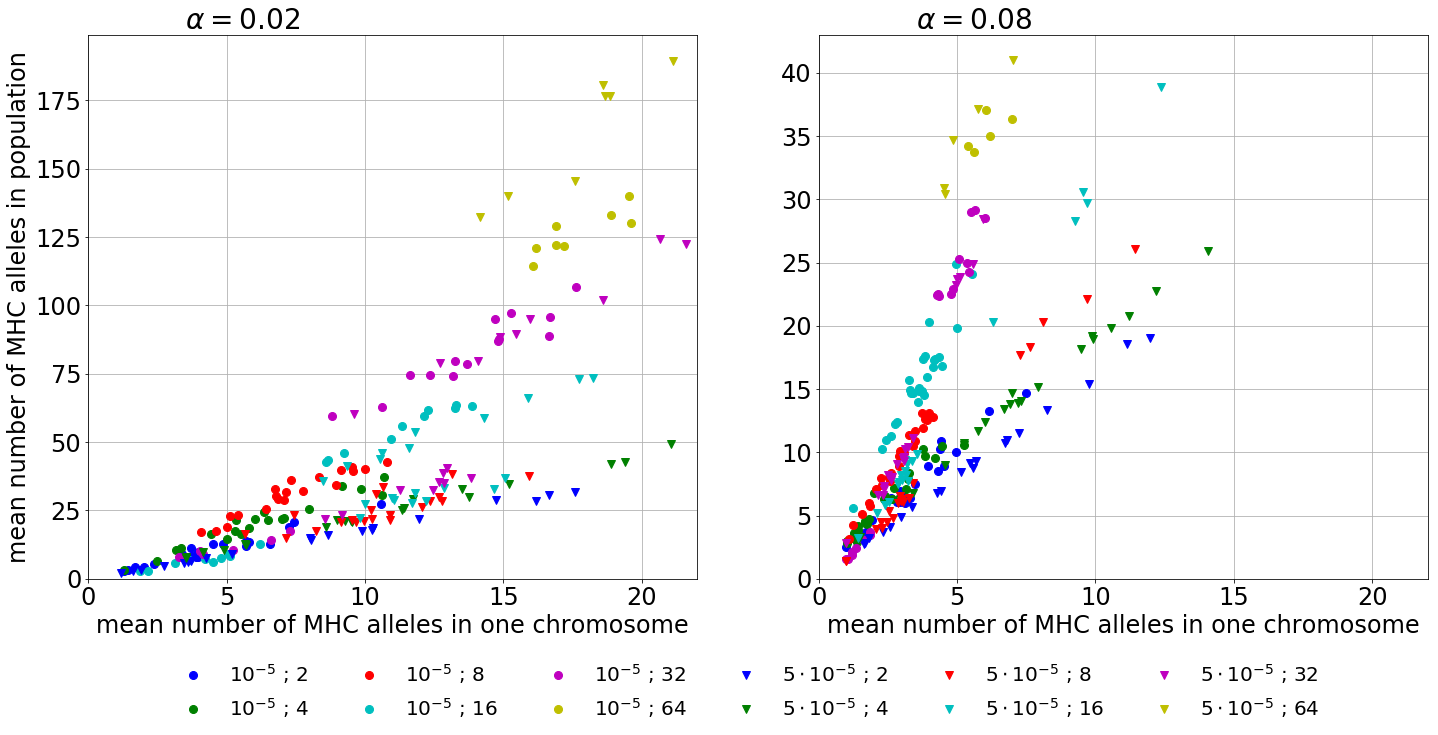

In [197]:
plotDotMeans(theData_002, theData_008)
plt.show()

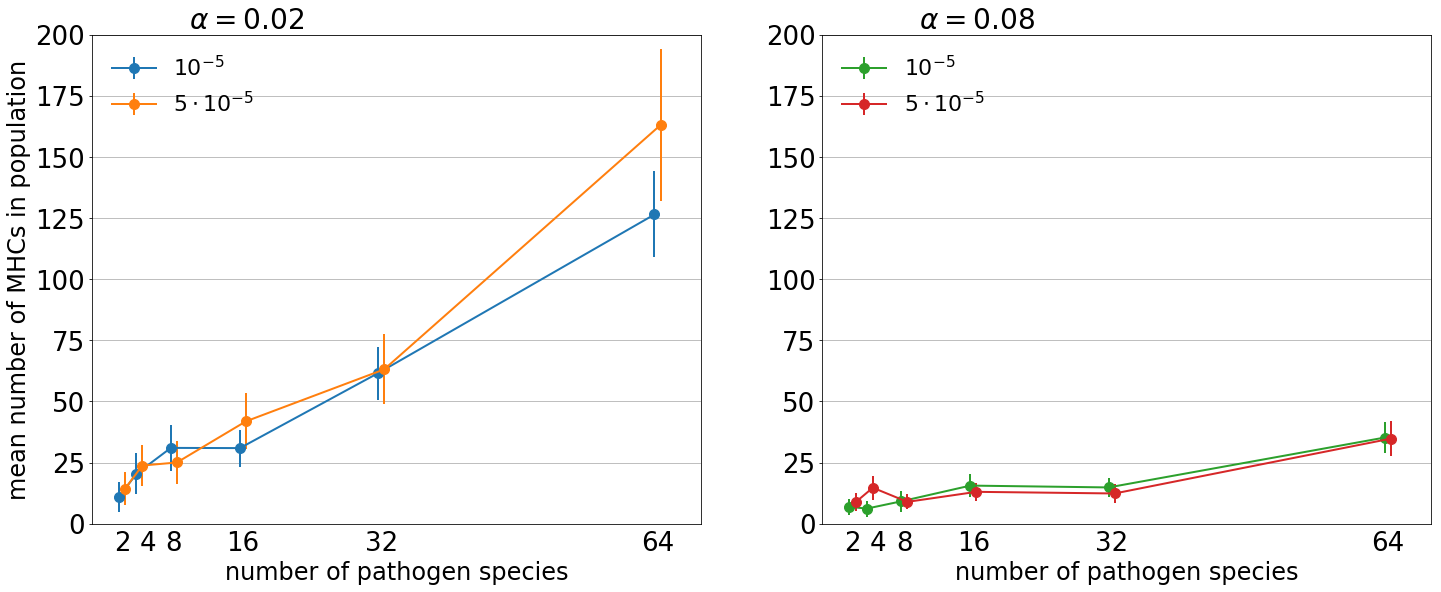

In [198]:
y_Label = "mean number of MHCs in population"
plotAvgMHCsInIndiv(meanResult, x_Label, y_Label, 2, 'S3', 200, 'upper left')
plt.show()